In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/project/Telemarketing/bank-additional-full.csv', delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# checking if the data set as null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],prefix=feature_to_encode).iloc[:,1:]
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [ ]:
columns = [ 'job', 'marital','education', 'default', 'housing','loan','contact','month','day_of_week','poutcome','y']

In [ ]:
df_copy = df
data = df

In [ ]:
for i in columns:
    data = encode_and_bind(data, i)

In [ ]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
data.shape

(41188, 54)

In [ ]:
X = data.drop(['y_yes'],axis=1)
Y = data['y_yes']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, stratify = Y)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing = None, seed = 42)
clf_xgb.fit(x_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(x_test, y_test)])

[0]	validation_0-auc:0.906058
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.907609
[2]	validation_0-auc:0.90888
[3]	validation_0-auc:0.912217
[4]	validation_0-auc:0.92583
[5]	validation_0-auc:0.926803
[6]	validation_0-auc:0.928701
[7]	validation_0-auc:0.930026
[8]	validation_0-auc:0.930316
[9]	validation_0-auc:0.931073
[10]	validation_0-auc:0.93111
[11]	validation_0-auc:0.933047
[12]	validation_0-auc:0.937898
[13]	validation_0-auc:0.938523
[14]	validation_0-auc:0.939014
[15]	validation_0-auc:0.939058
[16]	validation_0-auc:0.940671
[17]	validation_0-auc:0.940794
[18]	validation_0-auc:0.941543
[19]	validation_0-auc:0.942106
[20]	validation_0-auc:0.942811
[21]	validation_0-auc:0.943021
[22]	validation_0-auc:0.943303
[23]	validation_0-auc:0.943785
[24]	validation_0-auc:0.944155
[25]	validation_0-auc:0.944536
[26]	validation_0-auc:0.944826
[27]	validation_0-auc:0.944948
[28]	validation_0-auc:0.945535
[29]	validation_0-auc:0.945553
[30]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


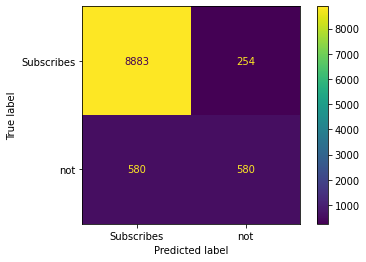

In [ ]:
plot_confusion_matrix(clf_xgb, x_test, y_test, values_format= 'd', display_labels=["Subscribes", "not"])

In [ ]:
param_grid = {
    'max_depth': [1,2,3,4,5],
    'learning_rate' : [0.1,0.01,0.05],
    'gamma' : [0, 0.25, 1.0],
    'reg_lamda' : [0.1, 1, 10],
    'scale_pos_weight': [1,3,5]

}

In [ ]:
optimal_params = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic', seed = 42, subsample = 0.9, colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring = 'roc_auc',
                              verbose = 0,
                              n_jobs = 10,
                              cv = 3
                              )

In [ ]:
optimal_params.fit(x_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(x_test, y_test)])
print(optimal_params.best_params_)

[0]	validation_0-auc:0.923921
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.927505
[2]	validation_0-auc:0.936532
[3]	validation_0-auc:0.939094
[4]	validation_0-auc:0.941637
[5]	validation_0-auc:0.939876
[6]	validation_0-auc:0.938159
[7]	validation_0-auc:0.936841
[8]	validation_0-auc:0.941915
[9]	validation_0-auc:0.940619
[10]	validation_0-auc:0.943299
[11]	validation_0-auc:0.942205
[12]	validation_0-auc:0.941304
[13]	validation_0-auc:0.940038
[14]	validation_0-auc:0.943671
[15]	validation_0-auc:0.942376
[16]	validation_0-auc:0.941316
[17]	validation_0-auc:0.940282
[18]	validation_0-auc:0.939397
[19]	validation_0-auc:0.938388
[20]	validation_0-auc:0.94279
[21]	validation_0-auc:0.945457
[22]	validation_0-auc:0.944746
[23]	validation_0-auc:0.944133
[24]	validation_0-auc:0.946513
[25]	validation_0-auc:0.947881
[26]	validation_0-auc:0.948938
[27]	validation_0-auc:0.949645
[28]	validation_0-auc:0.949534
[29]	validation_0-auc:0.949479
[30]	validation_0

In [ ]:
clf_xgb = xgb.XGBClassifier(seed = 42, objective='binary:logistic', gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.9, colsample_bytree=0.5)
clf_xgb.fit(x_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric = 'auc', eval_set = [(x_test, y_test)])

[0]	validation_0-auc:0.926568
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.928004
[2]	validation_0-auc:0.936268
[3]	validation_0-auc:0.938991
[4]	validation_0-auc:0.941168
[5]	validation_0-auc:0.939957
[6]	validation_0-auc:0.938176
[7]	validation_0-auc:0.936396
[8]	validation_0-auc:0.941425
[9]	validation_0-auc:0.94002
[10]	validation_0-auc:0.943189
[11]	validation_0-auc:0.941962
[12]	validation_0-auc:0.941312
[13]	validation_0-auc:0.939904
[14]	validation_0-auc:0.943479
[15]	validation_0-auc:0.942156
[16]	validation_0-auc:0.941141
[17]	validation_0-auc:0.940233
[18]	validation_0-auc:0.939374
[19]	validation_0-auc:0.938349
[20]	validation_0-auc:0.942908
[21]	validation_0-auc:0.945387
[22]	validation_0-auc:0.944713
[23]	validation_0-auc:0.944189
[24]	validation_0-auc:0.946443
[25]	validation_0-auc:0.94789
[26]	validation_0-auc:0.949069
[27]	validation_0-auc:0.949745
[28]	validation_0-auc:0.949652
[29]	validation_0-auc:0.949592
[30]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1.0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.9, verbosity=1)

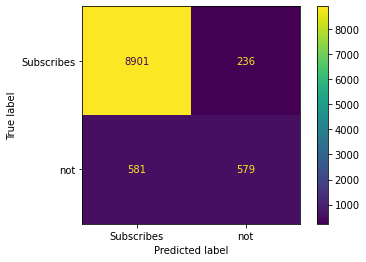

In [ ]:
plot_confusion_matrix(clf_xgb, x_test, y_test, values_format= 'd', display_labels=["Subscribes", "not"])